# **Home Credit Risk Business Analyst Test**

Candidate: Tuan Le Khac

Date: 6th Mar, 2025

## Requirements

- **1 pt for**: data inspection, cleaning, transformation (if any);
- **3 pts for**: exploratory data analysis, including visualization, statistic and correlation or distribution analysis to identify high risk segment;
- **3 pts for**: feature engineering & selection with rationale/method described;
- **1 pt for**: predictive model building (use 70/20/10 split for train/test/valid, random_state = 0);
- **2 pts for**: model validation & assessment, use suitable metrics to test stability, target distinguished power, accuracy and/or null hypothesis test.

## Data inspection and pre-processing

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('classic')

Load the dataset and merge

In [23]:
data = pd.read_excel('Home_Credit_Risk_Business_Analyst_Test.xlsx', sheet_name='data')
target = pd.read_excel('Home_Credit_Risk_Business_Analyst_Test.xlsx', sheet_name='target')

data = pd.merge(data, target, on='person ID')
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.head(10)

,person_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,1,22,59000,RENT,123.0,CL,D,35000,16.02,0.59,Y,3,1
1,2,21,9600,OWN,5.0,NS,B,1000,11.14,0.10,N,2,0
2,3,25,9600,MORTGAGE,1.0,PE,C,5500,12.87,0.57,N,3,1
3,4,23,65500,RENT,4.0,PE,C,35000,15.23,0.53,N,2,1
4,5,24,54400,RENT,8.0,PE,C,35000,14.27,0.55,Y,4,1
5,6,21,9900,OWN,2.0,TW,A,2500,7.14,0.25,N,2,1
6,7,26,77100,RENT,8.0,NS,B,35000,12.42,0.45,N,3,1
7,8,24,78956,RENT,5.0,PE,B,35000,11.11,0.44,N,4,1
8,9,24,83000,RENT,8.0,CL,A,35000,8.90,0.42,N,2,1
9,10,21,10000,OWN,6.0,TW,D,1600,14.74,0.16,N,3,1


## EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_id                   32581 non-null  int64  
 1   person_age                  32581 non-null  int64  
 2   person_income               32581 non-null  int64  
 3   person_home_ownership       32581 non-null  object 
 4   person_emp_length           31686 non-null  float64
 5   loan_intent                 32581 non-null  object 
 6   loan_grade                  32581 non-null  object 
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
 12  loan_status                 32581 non-null  int64  
dtypes: float64(3), int64(6), object

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_id,32581.0,16291.000000,9405.468897,1.00,8146.00,16291.00,24436.00,32581.00
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00


In [17]:
identifier = ['person_id']
features = [feature for feature in data.columns.tolist() if feature != 'loan_status' and feature not in identifier]
cat_features = [feature for feature in features if data[feature].dtype == 'object']
numeric_features = [feature for feature in features if feature not in cat_features]

In [18]:
cat_features

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [19]:
numeric_features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [22]:
def value_counter(data):
    for col in data.select_dtypes(['object']).columns:
        print(data[col].value_counts(dropna = False))
        print('--------------------------')
        
value_counter(data)

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
--------------------------
loan_intent
NS    6453
PE    6071
TW    5719
CL    5521
CC    5212
CD    3605
Name: count, dtype: int64
--------------------------
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
--------------------------
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64
--------------------------


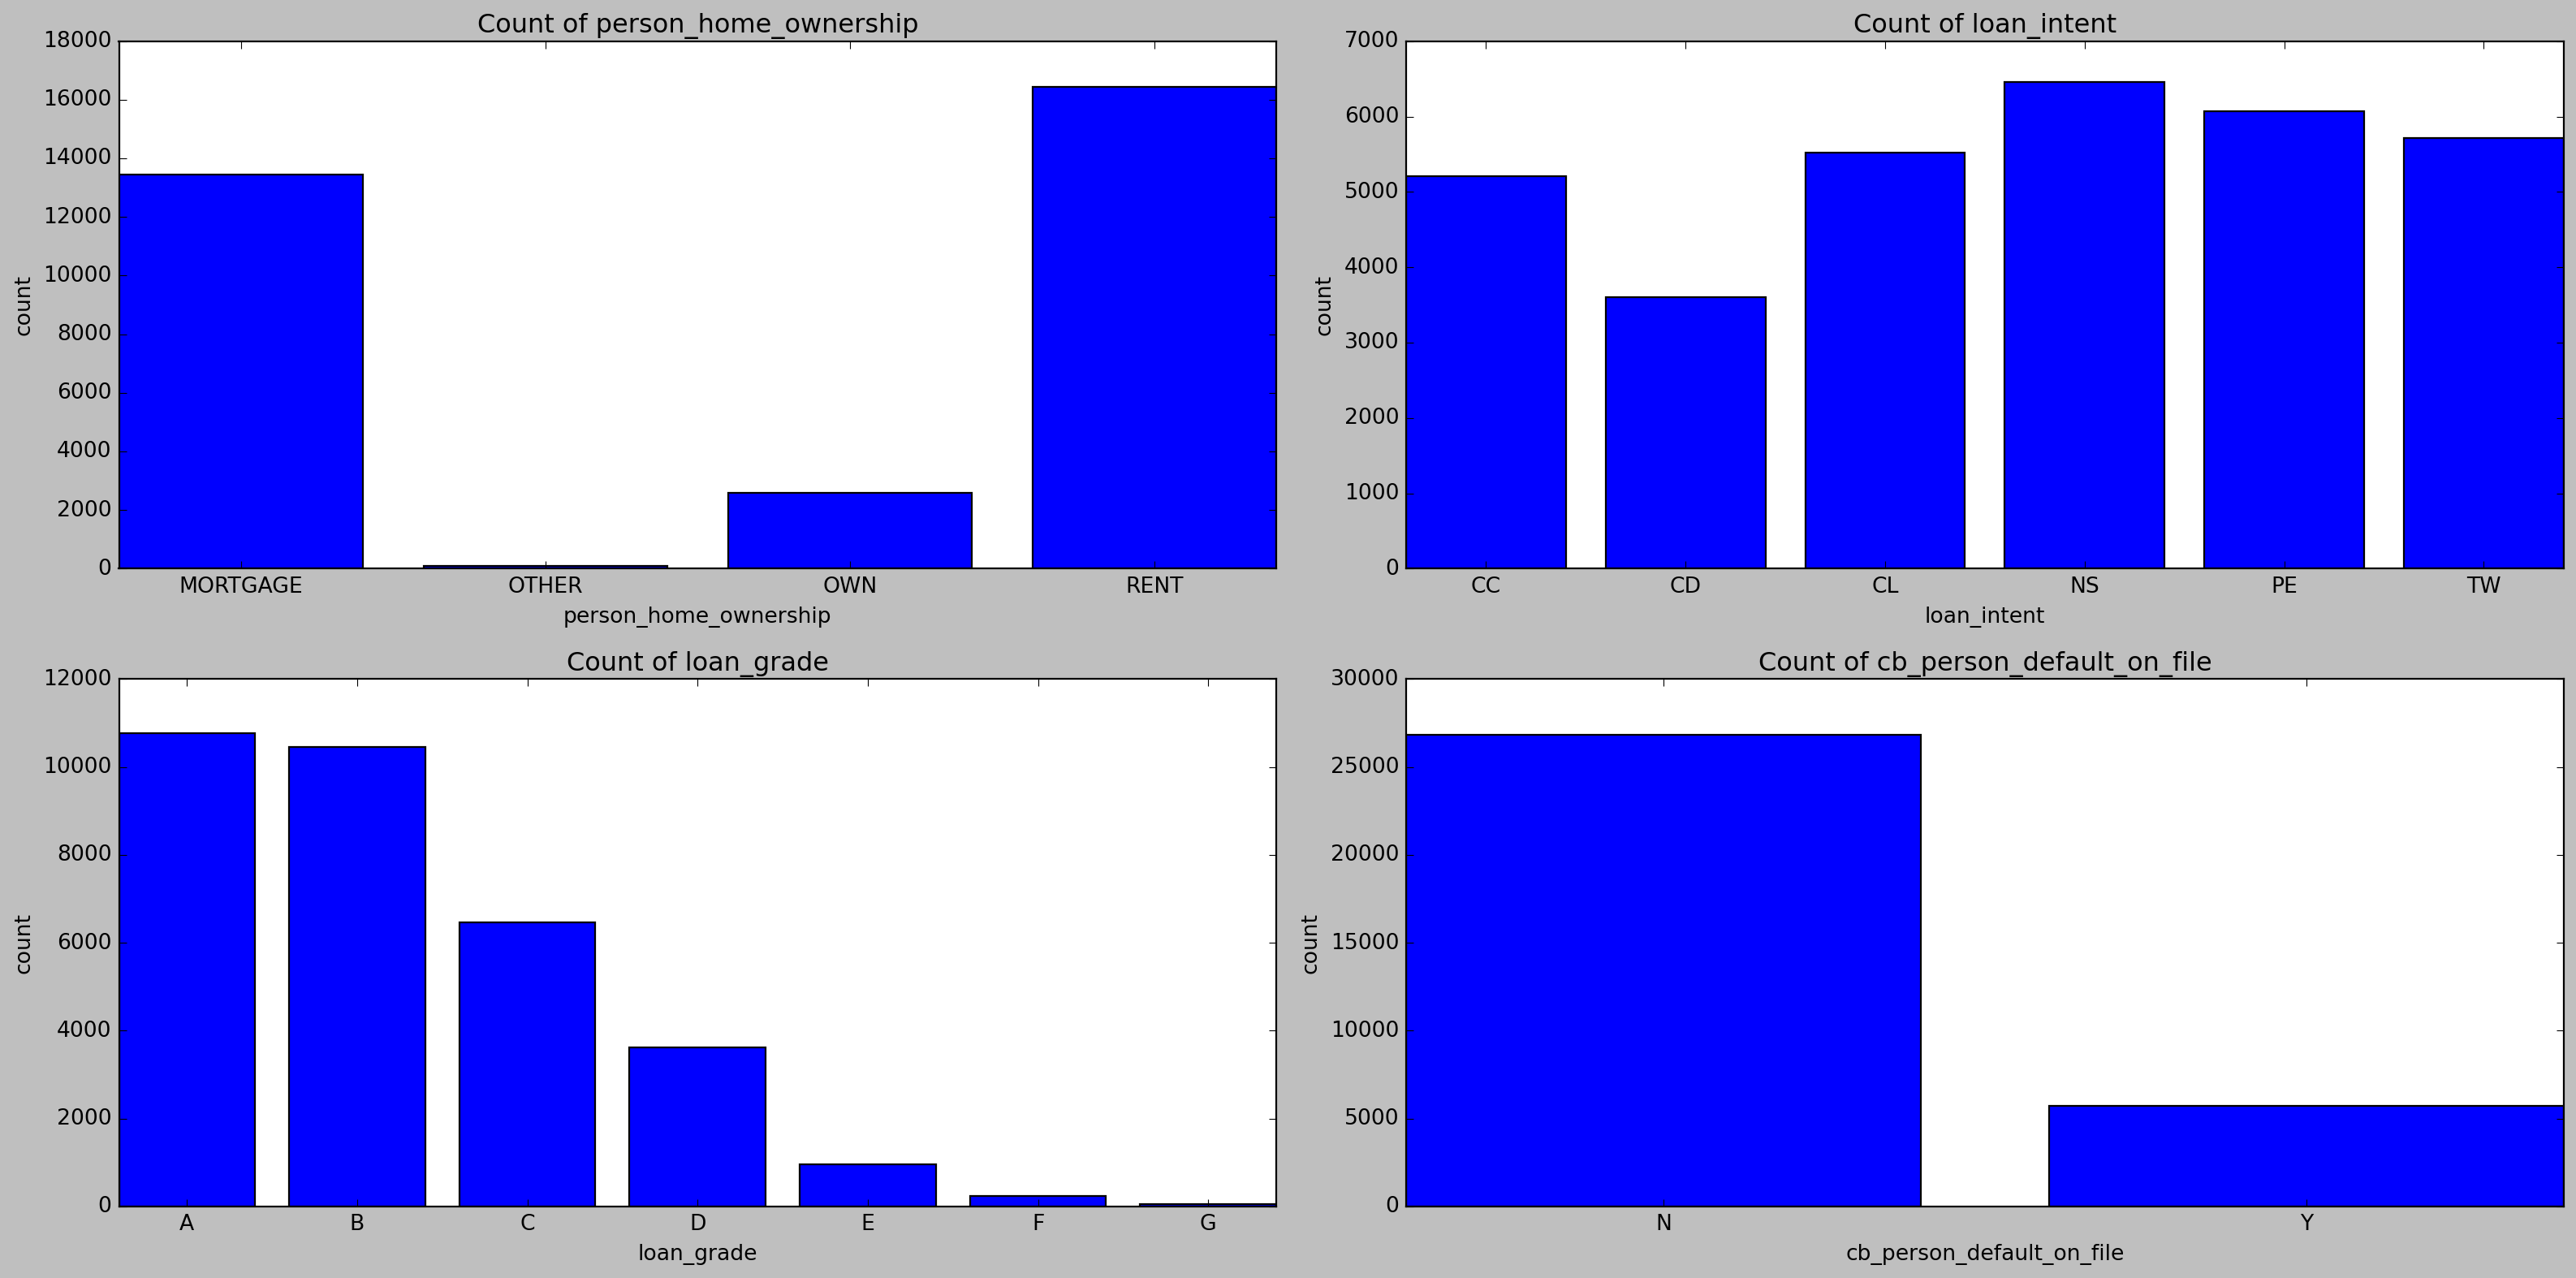

In [33]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
axes = axes.flatten()

for i, var in enumerate(cat_features):
    # group by each cat feature
    gb = data.groupby(var).size().reset_index(name='cnt')
    # plot
    axes[i].bar(gb[var], height=gb['cnt'])
    # labels and titles
    axes[i].set_title(f'Count of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Feature engineering

Train/test/validation split

In [35]:
from sklearn.model_selection import train_test_split
random_state = 24 # for re-productibility

In [ ]:
# features and target
X = data[features + ['loan_status']].copy()
y = X.pop('loan_status') # pop() removes `lgd` from X and return what we've deleted, ie assign it to y simultaneously

# first split: 70% train, 30% remaining
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=random_state, stratify=y
)

# second split: divide the 30% into 20% test and 10% validation
X_test, X_valid, y_test, y_valid = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=random_state, stratify=y_temp
)

splits = [X_train, X_test, X_valid]

for split in splits:
    print(f"Train: {len(split):,.0f}, Bad rate: {}\n")

Train: 22,806
Test: 6,516
Validation: 3,259


Binning

In [50]:
from optbinning import BinningProcess, OptimalBinning
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

In [41]:
binning_fit_woe = {
    'person_age': 
        {
            "monotonic_trend": "ascending",
            "solver": "cp"
        },
    'person_income':
        {
            "monotonic_trend": "ascending",
            "solver": "cp"            
        },
    'person_emp_length':
        {
            "monotonic_trend": "ascending",
            "solver": "cp"            
        },
    'loan_amnt':
        {
            "monotonic_trend": "ascending",
            "solver": "cp"            
        },
    'loan_int_rate':
        {
            "monotonic_trend": "ascending",
            "solver": "cp"            
        },
    'loan_percent_income':
        {
            "monotonic_trend": "ascending",
            "solver": "cp"            
        },
    'cb_person_cred_hist_length':
        {
            "monotonic_trend": "ascending",
            "solver": "cp"            
        },
    'person_home_ownership':
        {
            "dtype": "categorical"
        },
    'loan_intent':
        {
            "dtype": "categorical"
        },
    'loan_grade':
        {
            "dtype": "categorical"
        },
    'cb_person_default_on_file':
        {
            "dtype": "categorical"
        }
}

In [61]:
binning_process = BinningProcess(
    variable_names=list(X_train.columns),
    binning_fit_params=binning_fit_woe,
    min_n_bins=5
)
binning_process.fit(X_train, y_train)

BinningProcess(binning_fit_params={'cb_person_cred_hist_length': {'monotonic_trend': 'ascending',
                                                                  'solver': 'cp'},
                                   'cb_person_default_on_file': {'dtype': 'categorical'},
                                   'loan_amnt': {'monotonic_trend': 'ascending',
                                                 'solver': 'cp'},
                                   'loan_grade': {'dtype': 'categorical'},
                                   'loan_int_rate': {'monotonic_trend': 'ascending',
                                                     'solver': 'cp'},
                                   'loan_intent': {'dtype': 'categor...
                                                         'solver': 'cp'},
                                   'person_home_ownership': {'dtype': 'categorical'},
                                   'person_income': {'monotonic_trend': 'ascending',
                                                     'solver': 'cp'}},
               min_n_bins=5,
               variable_names=['person_age', 'person_income',
                               'person_home_ownership', 'person_emp_length',
                               'loan_intent', 'loan_grade', 'loan_amnt',
                               'loan_int_rate', 'loan_percent_income',
                               'cb_person_default_on_file',
                               'cb_person_cred_hist_length'])

In [62]:
binning_process.summary()

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
0,person_age,numerical,INFEASIBLE,True,1,0.0,0.0,0,0.0
1,person_income,numerical,INFEASIBLE,True,1,0.0,0.0,0,0.0
2,person_home_ownership,categorical,INFEASIBLE,True,1,0.0,0.0,0,0.0
3,person_emp_length,numerical,INFEASIBLE,True,1,0.007944,0.000983,0.01567,0.002716
4,loan_intent,categorical,OPTIMAL,True,6,0.104768,0.013015,0.175094,0.00389
5,loan_grade,categorical,INFEASIBLE,True,1,0.0,0.0,0,0.0
6,loan_amnt,numerical,OPTIMAL,True,7,0.076079,0.009388,0.126831,0.003499
7,loan_int_rate,numerical,OPTIMAL,True,11,0.689446,0.079446,0.41979,0.300717
8,loan_percent_income,numerical,OPTIMAL,True,10,0.941374,0.103052,0.442698,0.045429
9,cb_person_default_on_file,categorical,INFEASIBLE,True,1,0.0,0.0,0,0.0


In [45]:
def create_woe_pipeline(X_train, X_test, y_train, y_test):
    # transformer
    binning_process = BinningProcess(
        variable_names=list(X_train.columns),
        binning_fit_params=binning_fit_woe
    )
    # estimator
    lr_params = {
          "fit_intercept": True,
          "penalty": "l2",
          "random_state": 72,
          "solver": "liblinear",
          }
    logreg = LogisticRegression(**lr_params)
    
    pipeline = Pipeline(steps=[
                                ("binning_process", binning_process), 
                                ("regressor", logreg)
                                ]
                            )
    # binning then fitting the logistic regression
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict_proba(X_test)[:, 1]
    gini = roc_auc_score(y_test, y_pred)*2-1
    print(f"Gini : {gini:.2%}")

    return pipeline

In [46]:
ob_woe_lr = create_woe_pipeline(X_train, X_test, y_train, y_test)

# print coefficients
display(pd.DataFrame(
    list(zip(features, ob_woe_lr[1].coef_.ravel())), # .ravel() returns a contiguous flattened array
    columns=['feature', 'coefficient']
    ))

Gini : 74.33%


,feature,coefficient
0,person_age,8.660954e-02
1,person_income,2.961729e-16
2,person_home_ownership,-1.027022e+00
3,person_emp_length,-9.330135e-01
4,loan_intent,-1.414347e+00
5,loan_grade,-1.110968e+00
6,loan_amnt,1.359861e+00
7,loan_int_rate,-1.518446e-01
8,loan_percent_income,-1.357198e+00
9,cb_person_default_on_file,-2.370167e-02


## Model construction

## Model validation